<h2>Alkutoimet</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#kaavioiden tyyliasetus (ei ole pakollinen)
plt.style.use('seaborn-whitegrid')

from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter

#tätä käyttäen voin säätää kaavion vaaka-akselin ticksit 14 päivän välein
myLoc = MultipleLocator(14)

#tätä käyttäen voin esittää kaavion vaaka-akselin ticksit muodossa 13/01
myFmt = DateFormatter('%d/%m')

In [2]:
#tiedostojen avaaminen
elisa = pd.read_csv('http://taanila.fi/elisa.csv', 
                    sep = ';', decimal = ',', skiprows=1)
telia = pd.read_csv('http://taanila.fi/telia.csv', 
                    sep = ';', decimal = ',', skiprows=1)

elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-05-03,37.98,38.00,37.47,38.06,37.39,37.90,37.920,345768,13111187.26,2305,NaN
1,2019-05-02,37.44,37.47,36.83,37.64,36.65,37.50,37.404,498470,18643180.96,3151,NaN
2,2019-04-30,37.88,37.90,37.59,37.92,37.49,37.83,37.795,408314,15431223.28,2696,NaN
3,2019-04-29,37.80,37.82,38.00,38.00,37.69,37.76,37.799,299302,11313735.58,1954,NaN
4,2019-04-26,37.53,37.57,37.62,37.66,37.26,37.50,37.497,384834,14430024.16,2498,NaN


In [3]:
telia.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-05-03,3.814,3.817,3.770,3.817,3.770,3.812,3.800,630587,2396268.51,785,NaN
1,2019-05-02,3.773,3.775,3.790,3.817,3.767,3.776,3.785,817781,3095371.60,1115,NaN
2,2019-04-30,3.821,3.824,3.828,3.840,3.805,3.818,3.815,923156,3521753.95,1086,NaN
3,2019-04-29,3.834,3.836,3.845,3.846,3.821,3.836,3.833,980843,3759739.69,1078,NaN
4,2019-04-26,3.851,3.856,3.852,3.875,3.826,3.853,3.852,588889,2268610.24,675,NaN


In [4]:
#aikaleimat indeksiin
elisa.index = pd.to_datetime(elisa['Date'])
telia.index = pd.to_datetime(telia['Date'])

#järjestys vanhimmasta uusimpaan
elisa.sort_index(inplace = True)
telia.sort_index(inplace = True)

In [5]:
elisa.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2014-05-05,2014-05-05,21.77,21.79,21.82,21.99,21.65,21.79,21.765,309141,6.728298e+06,1413,NaN
2014-05-06,2014-05-06,22.03,22.04,21.80,22.04,21.80,22.03,21.981,382136,8.399652e+06,1534,NaN
2014-05-07,2014-05-07,22.02,22.04,21.99,22.24,21.94,22.02,22.071,573404,1.266332e+07,2326,NaN
2014-05-08,2014-05-08,22.03,22.05,22.07,22.19,21.90,22.05,22.062,294651,6.500639e+06,1589,NaN
2014-05-09,2014-05-09,21.99,22.00,22.03,22.14,21.84,21.99,21.970,427121,9.383639e+06,2347,NaN


<h2>Viivakaavioita</h2>

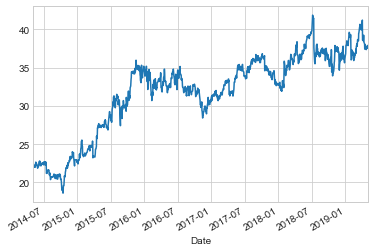

In [6]:
elisa['Closing price'].plot()

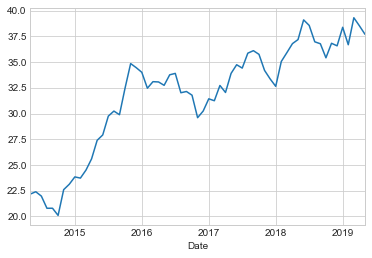

In [7]:
#kuukausittaiset keskiarvohinnat
elisa['Closing price'].resample('M').mean().plot()

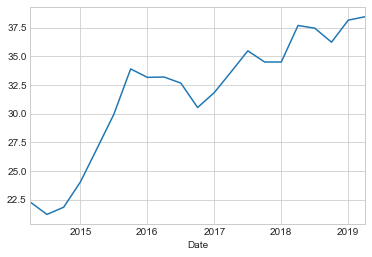

In [8]:
#vuosineljännesten keskiarvohinnat
elisa['Closing price'].resample('Q').mean().plot()

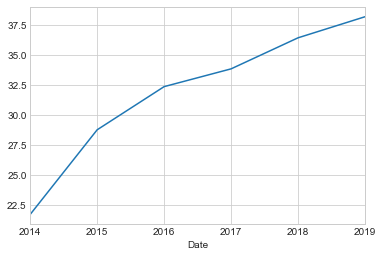

In [9]:
#vuosien keskiarvohinnat
elisa['Closing price'].resample('Y').mean().plot()

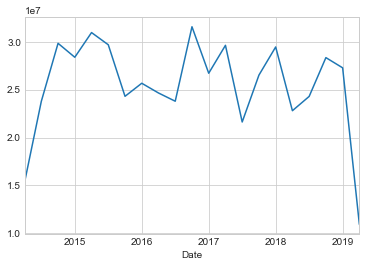

In [10]:
#vaihto osakkeiden lukumääränä vuosineljänneksittäin
elisa['Total volume'].resample('Q').sum().plot()

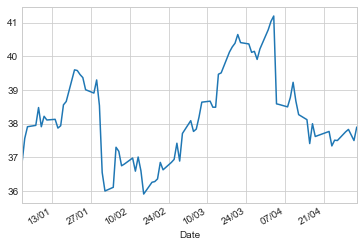

In [11]:
#vuoden 2019 alusta
ax1 = elisa['Closing price']['2019':].plot()

#aika-akselin ticksien tuunaus
ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

<h2>Liukuvia keskiarvoja</h2>

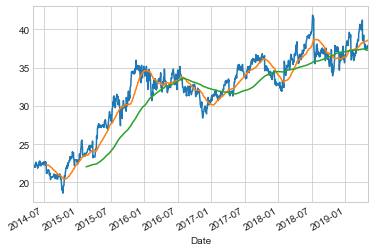

In [12]:
elisa['Closing price'].plot()

#liukuvia keskiarvoja
elisa['Closing price'].rolling(50).mean().plot()
elisa['Closing price'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

In [13]:
#hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Closing price'].pct_change()
telia['Telia%'] = telia['Closing price'].pct_change()

In [14]:
#Elisan ja Telian prosenttimuutokset samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)
muutokset.head()

,Elisa%,Telia%
Date,,
2014-05-05,NaN,NaN
2014-05-06,0.011014,0.005709
2014-05-07,-0.000454,0.001892
2014-05-08,0.001362,0.013220
2014-05-09,-0.002721,-0.001864


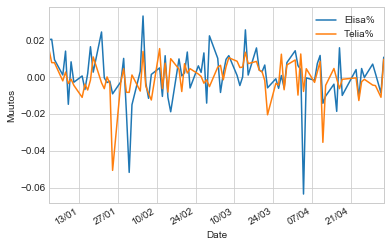

In [15]:
ax2 = muutokset['2019':].plot()

ax2.set_ylabel('Muutos')

#aika-akselin ticksien tuunaus
ax2.xaxis.set_major_locator(myLoc)
ax2.xaxis.set_major_formatter(myFmt)

In [16]:
#tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1256.000000,1256.000000
mean,0.000539,-0.000172
std,0.013987,0.012902
min,-0.092226,-0.079728
25%,-0.006249,-0.006888
50%,0.000644,-0.000499
75%,0.007544,0.007088
max,0.065693,0.083107


In [17]:
#päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%'])>0.05) | 
          (abs(muutokset['Telia%'])>0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [18]:
#Viikonpäivät omaan sarakkeeseen (0=maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,249.0,0.001432,0.013192,-0.055172,-0.004443,0.000849,0.007492,0.057805
1,255.0,0.000657,0.012629,-0.036921,-0.007492,0.000830,0.007167,0.065693
2,255.0,0.000291,0.012972,-0.053899,-0.005726,0.000000,0.007217,0.058061
3,251.0,0.000456,0.014823,-0.074751,-0.006554,0.000907,0.008114,0.057869
4,246.0,-0.000147,0.016143,-0.092226,-0.006985,0.000803,0.007490,0.061796


In [19]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,249.0,-0.000070,0.013725,-0.079728,-0.006598,-0.001045,0.007269,0.039216
1,255.0,-0.000191,0.012014,-0.037550,-0.006719,-0.000847,0.006112,0.048600
2,255.0,0.000289,0.011690,-0.044934,-0.006170,0.000000,0.007634,0.042407
3,251.0,-0.000822,0.013159,-0.066554,-0.007971,-0.000496,0.006667,0.039604
4,246.0,-0.000070,0.013903,-0.050542,-0.007174,0.000000,0.007112,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [20]:
#Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.corr()

,Elisa%,Telia%,Weekday
Elisa%,1.000000,0.496988,-0.033725
Telia%,0.496988,1.000000,-0.006971
Weekday,-0.033725,-0.006971,1.000000


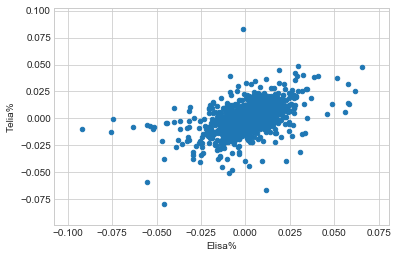

In [21]:
#muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x='Elisa%', y='Telia%')

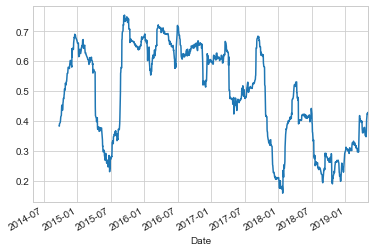

In [22]:
#liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina:
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

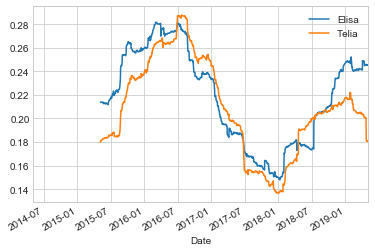

In [23]:
#volatiliteetti kertoo osakkeeseen sisältyvästä riskistä
#seuraavasta selviää, miten riski on vaihdellut ajan kuluessa
(muutokset['Elisa%'].rolling(252).std()*(252**0.5)).plot(label='Elisa', legend=True)
(muutokset['Telia%'].rolling(252).std()*(252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

(3, 6)

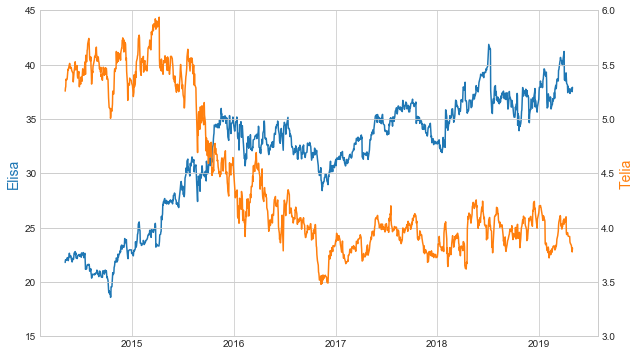

In [24]:
#luon figure- ja axes-oliot
fig, ax = plt.subplots(figsize = (10, 6))

#määritän ax1-olion
ax.set_ylabel('Elisa', color='C0', fontsize=14)
ax.plot(elisa['Closing price'], color='C0')
ax.set_ylim(15,45)

#luon Telialle toisen axes-olion, jolla on yhteinen x-akseli ax-olion kanssa
ax_T = ax.twinx()

ax_T.set_ylabel('Telia', color='C1', fontsize=14)
ax_T.plot(telia['Closing price'], color='C1')
ax_T.set_ylim(3,6)